In [19]:
import cv2

# Load an image
image = cv2.imread('/content/jpg_CV.jpg')

# Save with JPEG compression (quality 50)blob:https://colab.research.google.com/11964467-d143-4c6a-bf10-67311c47ddbd
cv2.imwrite('compressed_image.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 50])


True

In [20]:
cv2.imwrite('compressed_image.png', image, [cv2.IMWRITE_PNG_COMPRESSION, 9])



True

In [21]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8616 - loss: 0.4840 - val_accuracy: 0.9800 - val_loss: 0.0655
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9812 - loss: 0.0613 - val_accuracy: 0.9851 - val_loss: 0.0449
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0389 - val_accuracy: 0.9893 - val_loss: 0.0318
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9910 - loss: 0.0293 - val_accuracy: 0.9877 - val_loss: 0.0347
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9893 - val_loss: 0.0310
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 0.9883 - val_loss: 0.0368
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9924 - val_loss: 0.0259
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes))

# Compute confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       1.00      0.97      0.99       982
           5       0.96      1.00      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 979    0    0    0    0    0    0    1    0    0]
 [   0 1133    0    0    0    1    0    0    1    0]
 [   2    3 1021    1    0    1    0    3    1    0]
 [   1    0    1  993    0   11    0    1

In [24]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [25]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3628 - loss: 1.7572 - val_accuracy: 0.5431 - val_loss: 1.3031
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5654 - loss: 1.2316 - val_accuracy: 0.5915 - val_loss: 1.1619
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6208 - loss: 1.0825 - val_accuracy: 0.6427 - val_loss: 1.0248
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6596 - loss: 0.9741 - val_accuracy: 0.6597 - val_loss: 0.9742
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6794 - loss: 0.9131 - val_accuracy: 0.6607 - val_loss: 0.9627
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7120 - loss: 0.8295 - val_accuracy: 0.6714 - val_loss: 0.9562
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7262 - loss: 0.7839 - val_accuracy: 0.6913 - val_loss: 0.8963
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7476 - loss: 0.7275 - val_accuracy: 0

In [26]:
from sklearn.metrics import roc_auc_score

# Compute AUC Score
auc_score = roc_auc_score(y_test, model.predict(x_test), multi_class='ovr')
print("AUC Score:", auc_score)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
AUC Score: 0.9550409555555556


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


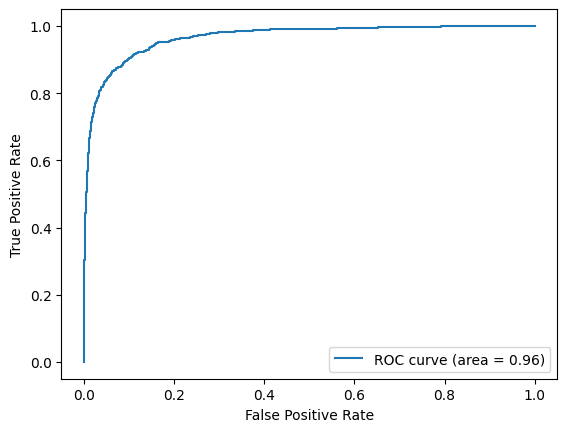

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve for class 0 (example)
fpr, tpr, _ = roc_curve(y_test[:, 0], model.predict(x_test)[:, 0])

plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
